### Coincidence system and charge association

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.ndimage as ndimage
import re

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

In [2]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

In [16]:
def pixel_map (data):
    
    nBars = 30
    N = len(data)
    hits = []
    matrix = np.zeros((nBars,nBars))
    sum_columns = np.zeros(nBars)
    sum_rows = np.zeros(nBars)

    sum_cl1 = 0
    sum_cl2 = 0
    sum_cl3 = 0

    sum_rw1 = 0
    sum_rw2 = 0
    sum_rw3 = 0

    Eventos = 0

    for k in range (N):

        columns = np.concatenate((data[k,0:27], data[k,29:32]), axis=0)
        rows = np.concatenate((data[k,32:35], data[k,37:64]), axis=0)

        if (np.sum(columns) == 1):    # Condición de activación de una barra por capa horizontal
            if (np.sum(rows) == 1):   # Condición de activación de una barra por capa vertical

                Eventos += 1
                hits.append(data[k,:])

                for i in range(nBars):   # Rows
                    for j in range(nBars):  # Columns

                        matrix[i,j]= matrix[i,j] + rows[i]*columns[j]

        #if (np.sum(columns) == 1):    # Condición de activación de una barra por capa horizontal
        #    if (np.sum(rows) == 1):   # Condición de activación de una barra por capa vertical

         #       Eventos += 1

    matrix = np.fliplr(matrix)  # Matrix reordering

    print 'Numero de eventos = ' + str(Eventos)
    print 'SNR = ' + str(100*Eventos/float(N))
    
    # 2D histogram plot
    
    fig = plt.figure(figsize=(35, 8))
    ax = fig.add_subplot(131)
    ax.set_xlabel('Columns', fontsize = 25)
    ax.set_ylabel('Rows', fontsize = 25)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.invert_yaxis()
    im = plt.imshow(matrix, interpolation='nearest', origin='low')

    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # Color bar
    clb = plt.colorbar()
    clb.set_label('Hits', fontsize = 25)

    # Increase tick labels
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    # 1D histogram
    
    # Channels histogram

    hist = np.sum(hits, axis=0)
    chs = np.linspace(0, 63, num=64)
    
    
    fig = plt.figure(figsize=(15, 5))
    plt.bar(chs, hist, alpha=0.5)
    plt.axvline(x=32, color='r', lw=2)
    #plt.text(15, 1100, "x bars", fontsize=20)
    #plt.text(45, 1100, "y bars", fontsize=20)
    plt.xlabel('Channel', fontsize = 25)
    plt.ylabel('Counts', fontsize = 25)
    plt.grid()
    

    return matrix

Line to filter the segmentation fault errors

for i in {00..23};do sed -i '/$$/d' ./MuTe_P2_2019_01_30h$i.dat; echo $i;done

In [82]:
data = np.loadtxt('field_data/HodCal/MuTe_P1_2019_03_23h14.dat','string', comments='#')
N = len(data)
print ('Pulsos = ' + str(N))

Pulsos = 11622


In [83]:
# Extract the events from the data

n_Chann = 64
events = np.zeros((N,n_Chann))

for i in range(N):

    x=(" ".join(data[i][4]))
    lin=map(int ,x.split(' '))
    if len(lin) == n_Chann:  # Lines with legth greater than 64
        events[i,:]=lin
    else:
        print ("Line : ") + str(i)

Line : 11621


In [84]:
hist = np.sum(events, axis=0)
chs = np.linspace(0, 63, num=64)

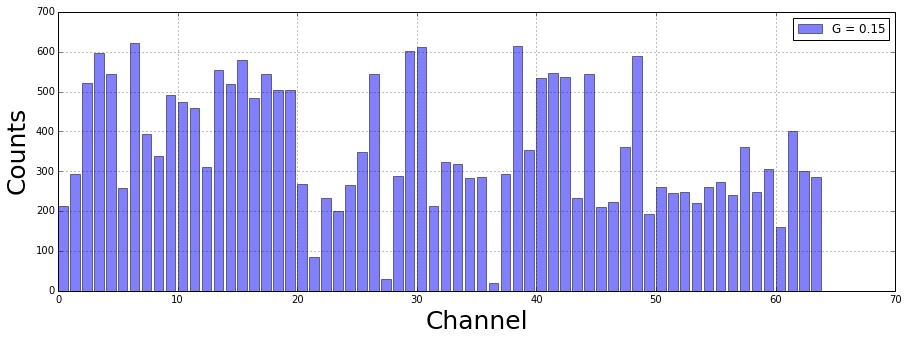

In [85]:
fig = plt.figure(figsize=(15, 5))
plt.bar(chs, hist, alpha=0.5)
plt.xlabel('Channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.legend(["G = 0.15", "Calibrated"])
plt.grid()

Numero de eventos = 2299
SNR = 19.7814489761


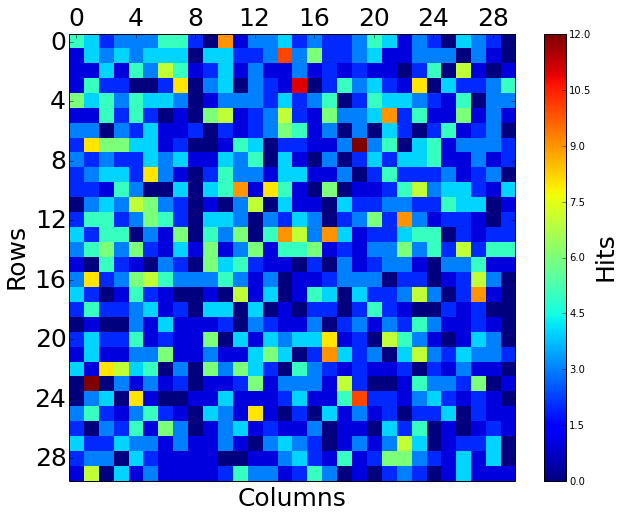

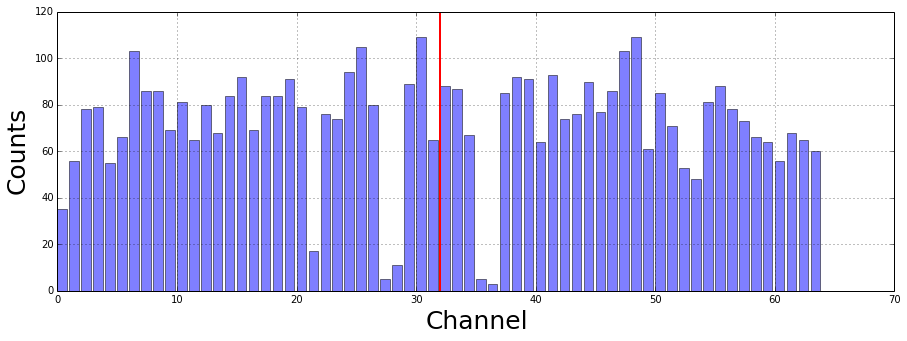

In [86]:
mat = pixel_map(events)

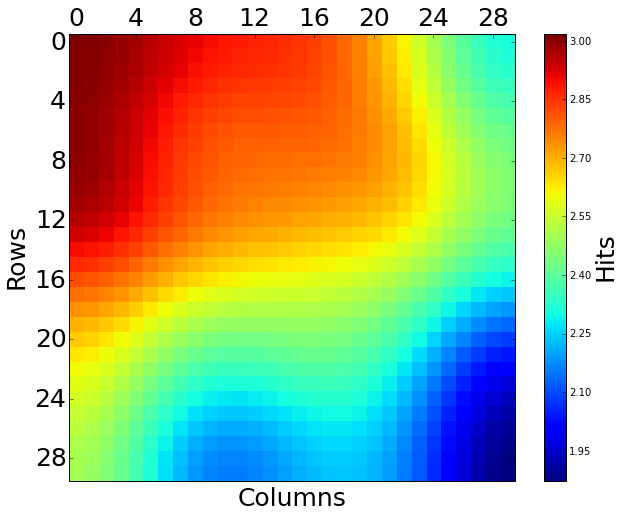

In [87]:
img = ndimage.gaussian_filter(mat, sigma=(5), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img, interpolation='nearest')
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
ax.invert_yaxis()
ax.xaxis.tick_top()

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

plt.show()

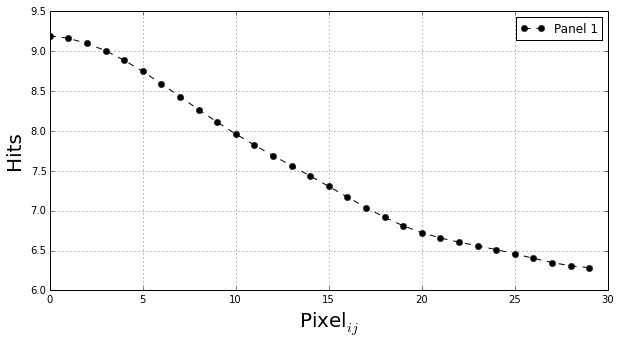

Atenuation percentage = 31.63 


In [32]:
diag = np.diagonal(img)

fig = plt.figure(figsize=(10, 5))
plt.plot(diag, '--ok')
plt.xlabel("Pixel$_{ij}$", fontsize = 20)
plt.ylabel("Hits", fontsize = 20)
plt.legend(["Panel 1", "Panle 2"], loc=1)
plt.grid()
plt.show()

print ("Atenuation percentage = %.2f " % ((np.max(diag) - np.min(diag))*100/np.max(diag)))

### Panel 2

In [113]:
data = np.loadtxt('field_data/HodCal/MuTe_P2_2019_03_23h14.dat','string', comments='#')
N = len(data)
print ('Pulsos = ' + str(N))

Pulsos = 10365


In [114]:
# Extract the events from the data

events = np.zeros((N,64))

for i in range(N):

    x=(" ".join(data[i][4]))
    lin=map(int ,x.split(' '))
    if len(lin) == 64:
        events[i,:]=lin

In [115]:
hist = np.sum(events, axis=0)
chs = np.linspace(0, 63, num=64)

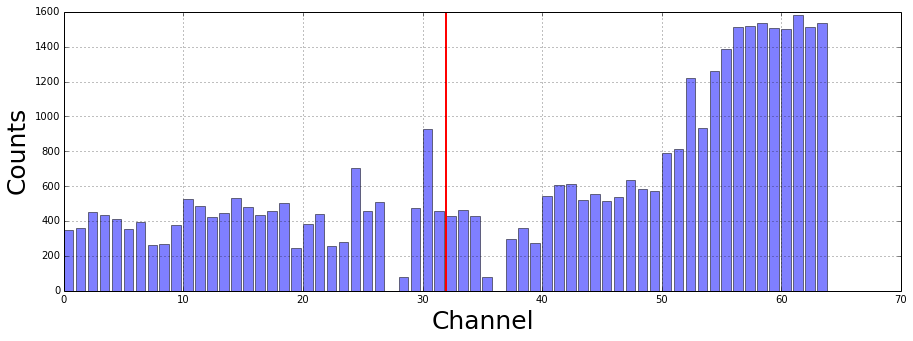

In [116]:
fig = plt.figure(figsize=(15, 5))
plt.bar(chs, hist, alpha=0.5)
plt.axvline(x=32, color='r', lw=2)
plt.xlabel('Channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
#plt.legend(["G = 0.15", "Calibrated"])
plt.grid()

Numero de eventos = 1139
SNR = 10.9889049686


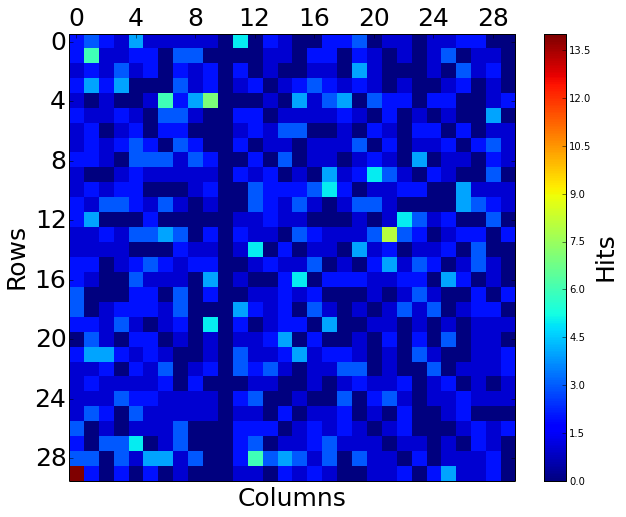

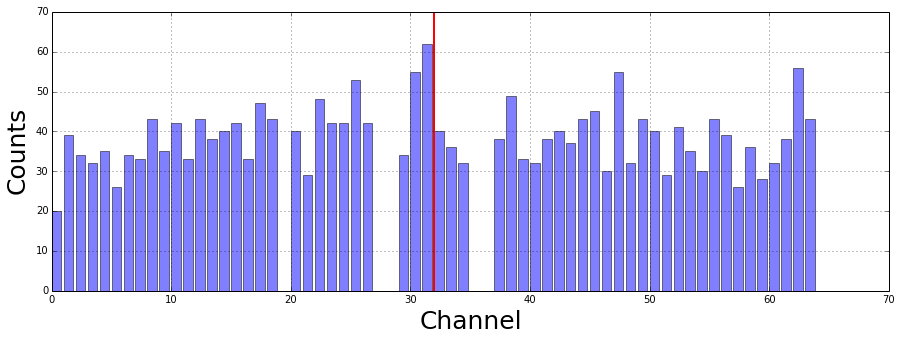

In [117]:
mat = pixel_map(events)

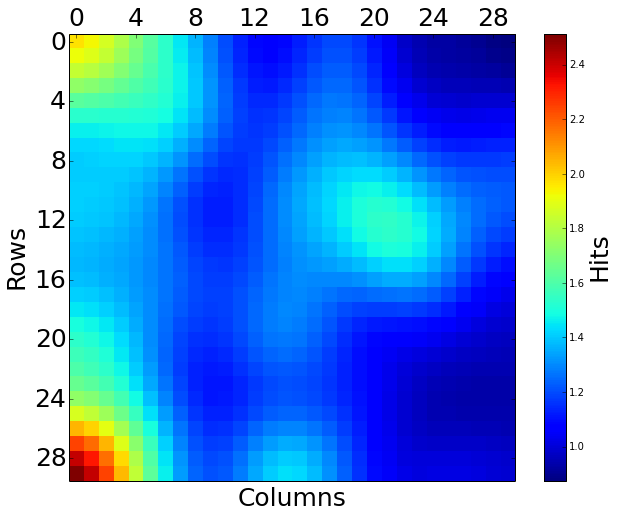

In [118]:
img = ndimage.gaussian_filter(mat, sigma=(3), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img, interpolation='nearest')
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
ax.invert_yaxis()
ax.xaxis.tick_top()

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

plt.show()

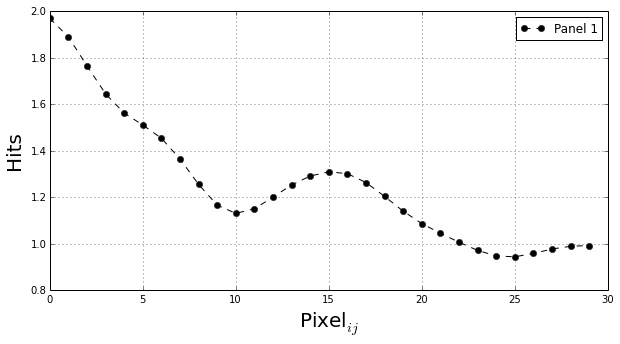

Atenuation percentage = 52.03 


In [119]:
diag = np.diagonal(img)

fig = plt.figure(figsize=(10, 5))
plt.plot(diag, '--ok')
plt.xlabel("Pixel$_{ij}$", fontsize = 20)
plt.ylabel("Hits", fontsize = 20)
plt.legend(["Panel 1", "Panle 2"], loc=1)
plt.grid()
plt.show()

print ("Atenuation percentage = %.2f " % ((np.max(diag) - np.min(diag))*100/np.max(diag)))

### Hodoscope coincidence

The first test was to measure the difference between the data recorded in both panels.

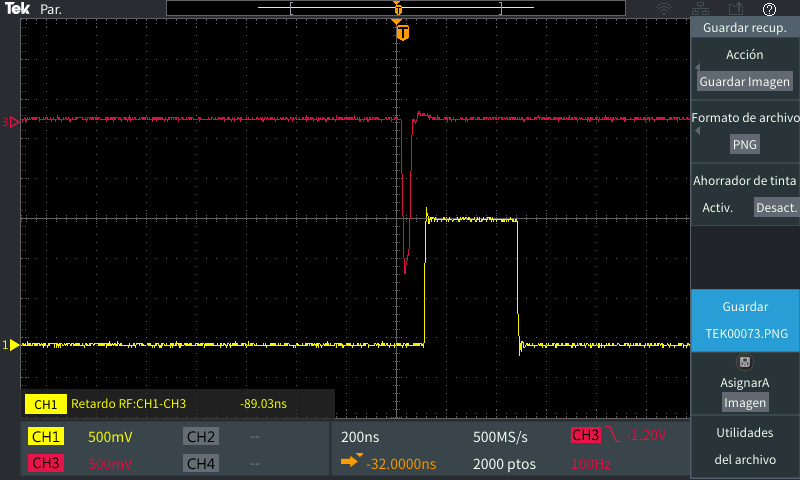

In [5]:
from IPython.display import Image
Image(filename='Figures/Emulador.PNG', width = 500)

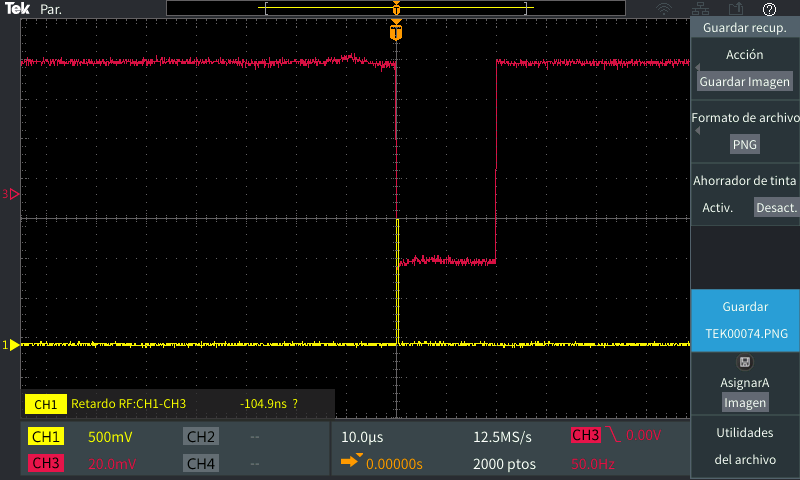

In [6]:
from IPython.display import Image
Image(filename='Figures/Generador.PNG', width = 500)

For the coincidence trigger we source the panels with the same signal in order to get a coincidence time and its standard deviation:

### Image creation

In [219]:
file_Panel_1 = 'field_data/HodCal/MuTe_P1_2019_03_23h00.dat'
file_Panel_2 = 'field_data/HodCal/MuTe_P2_2019_03_23h00.dat'
file_WCD = 'field_data/WCD/Rate_WCD_sT_23_00M.dat'

count = 0
for line in open(file_Panel_1).xreadlines(  ): count += 1

print ("Number of lines P1: ") + str(count)

count = 0
for line in open(file_Panel_2).xreadlines(  ): count += 1

print ("Number of lines P2: ") + str(count)

count = 0
for line in open(file_WCD).xreadlines(  ): count += 1

print ("Number of lines WCD: ") + str(count)

Number of lines P1: 35727
Number of lines P2: 30379
Number of lines WCD: 8203


### Init time

In [220]:

with open(file_Panel_1) as f:
    i = 0;
    for line in f:
        
        if line[0] == '#':
            if line[2] == 's':
                init_Time1 = int(line[4:15])
                L1 = i
                print "Time P1 : " + str(init_Time1) + " Line : " + str(L1)
                break
        i+= 1
                
with open(file_Panel_2) as f:
    i = 0
    for line in f:
        if line[0] == '#':
            if line[2] == 's':
                init_Time2 = int(line[4:15])
                L2 = i
                print "Time P2 : " + str(init_Time2) + " Line : " + str(L2)
                break
        i += 1

Time P1 : 1553299201 Line : 22
Time P2 : 1553299201 Line : 21


### Tree data creation

In [221]:
with open(file_Panel_1) as P1:
    
    p1_Dic={}
    array = []
    for line in P1:
        
        if line[0] != '#':
            array.append(line)
        
        
        if line[0] == '#':
            if line[2] == 's':
                address = line[4:14]
                p1_Dic[address] = array
                array = []


with open(file_Panel_2) as P2:
    
    p2_Dic={}
    array = []
    for line in P2:
        
        if line[0] != '#':
            array.append(line)
        
        if line[0] == '#':
            if line[2] == 's':
                address = line[4:14]
                p2_Dic[address] = array
                array = []


with open(file_WCD) as WCD:
    
    WCD_Dic={}
    array = []
    
    for line in WCD:
        
        if line[0] != '#':
            array.append(line)
        
        if line[0] == '#':
            address = line[2:12]
            WCD_Dic[address] = array
            array = []
        

### Matching matrices creation

In [222]:
def match(file, address, p1_mat, p2_mat, WCD_mat, window):
    
    fine_Res = 25
    coarse_Res = 400
    counter = 0
    
    t_Ratio = 2.5
    epsilon = 0.1

    len_P1 = len(p1_mat)
    len_P2 = len(p2_mat)
    len_WCD = len(WCD_mat)

    file.write("# s " + address + "\n")
    
    if len_P1 <= len_P2:
        file.write("# r " + str(len_P1) + "\n")
    else:
        file.write("# r " + str(len_P2) + "\n")
    
    for i in range (len_P1):
        line_P1 = re.split(r'\t+', p1_mat[i])
        time_P1 = int(line_P1[3])
        fine_P1 = int(line_P1[1])*fine_Res
        coarse_P1 = int(line_P1[2])*coarse_Res
        ToF_P1 = fine_P1 + coarse_P1
        
        for j in range (len_P2):
            line_P2 = re.split(r'\t+', p2_mat[j])
            time_P2 = int(line_P2[3])
            fine_P2 = int(line_P2[1])*fine_Res
            coarse_P2 = int(line_P2[2])*coarse_Res
            ToF_P2 = fine_P2 + coarse_P2
            
            av_ToF = (ToF_P1 + ToF_P2)/2.0
            error = np.absolute(time_P1-time_P2)
   
            if  error < window:
                
                charge = 0

                for k in range(len_WCD):

                    line_WCD = re.split(r' ', WCD_mat[k])
                    time_WCD = int(line_WCD[0])
                    t_Error = np.absolute(1- time_P1/(time_WCD*t_Ratio))

                    if t_Error < epsilon:
                        charge = int(line_WCD[1])
                        counter += 1
                    
                file.write(str(counter) + "\t" + str(time_P1) + "   \t" +  str(error) + "\t" + str(av_ToF)  + "\t" + line_P1[4][:-1] + "\t" + line_P2[4][:-1] + "\t" + str(charge) +"\n")
                charge = 0
                
    return counter

### Coincidence file creation

In [223]:
nevents_P1 = len(p1_Dic)
nevents_P2 = len(p2_Dic)

file = open("c_Charge_23_01.dat", 'w')

window = 400
match_counter = 0
event_counter = 0

for i in range (3600):
    i+=1
    address_P1 = str(init_Time1 + i)
    address_P2 = str(init_Time1 + i + 1)    # P2 time matching
    address_WCD = str(init_Time1 + i + 1)

    if p1_Dic.get(address_P1) != None:
            if p2_Dic.get(address_P2) != None:
                if WCD_Dic.get(address_WCD) != None:
                    
                    p1_mat = p1_Dic[address_P1]
                    p2_mat = p2_Dic[address_P2]
                    WCD_mat = WCD_Dic[address_WCD]

                    events = match(file, address_P1, p1_mat, p2_mat, WCD_mat, window)
                    match_counter += 1
                    event_counter = event_counter + events

file.close() 

print "Seconds matched = " + str(match_counter)
print "dE/dx events matched = " + str(event_counter)

Seconds matched = 3283
dE/dx events matched = 1188


### Histogram generation 

In [225]:
nBars =  30         # Number of bars per axis
Nd = (2*nBars-1)    # Number of trajectories
C = nBars-2         # Shiffting index

matrix_P1 = np.zeros((nBars,nBars))
matrix_P2 = np.zeros((nBars,nBars))


matrix_ang = np.zeros((Nd,Nd))

sum_columns = np.zeros(nBars)
sum_rows = np.zeros(nBars)

sum_cl1 = 0
sum_cl2 = 0
sum_cl3 = 0

sum_rw1 = 0
sum_rw2 = 0
sum_rw3 = 0

evento = 0

with open('c_Charge_23_01.dat') as Hits:
    
    for line in Hits:
        if line[0] != '#' and line[0] != '\t' and line[0] != '\n':
        
            split_line = re.split(r'\t+', line)
            P1 = split_line[4]
            P2 = split_line[5]
            charge = int(split_line[6])
            
            try:
                # Panel 1 
            
                columns_P1 = map(int ,(" ".join(P1[0:27] + P1[29:32])).split(' '))
                rows_P1 = map(int ,(" ".join(P1[32:35] + P1[37:64])).split(' '))
    
                # Panel 2 
    
                columns_P2 = map(int ,(" ".join(P2[0:27] + P2[29:32])).split(' '))
                rows_P2 = map(int ,(" ".join(P2[32:35] + P2[37:64])).split(' '))
            
    
                suma_P1_col = np.sum(columns_P1) 
                suma_P1_row =  np.sum(rows_P1)
                suma_P2_col =  np.sum(columns_P2)
                suma_P2_row =  np.sum(rows_P2)
    
            
            except ValueError as e:
                print "Error at event " + split_line[1] + "\n"
        
            if (suma_P1_col == 1 and suma_P1_row == 1 and suma_P2_col == 1 and suma_P2_row == 1):   # Condición de activación de solo 4 barras
                for i in range(nBars):
                    for j in range(nBars):
            
                        matrix_P1[i,j]= rows_P1[i]*columns_P1[j]
                        matrix_P2[i,j]= rows_P2[i]*columns_P2[j]
        
                if (np.sum(matrix_P1) == 1 and np.sum(matrix_P2) == 1 and (charge < 300)):
    
                    for i in range(nBars):
                        for j in range(nBars):
            
                            if matrix_P1[i,j]== 1:
                                iP1 = i
                                jP1 = j
                            if matrix_P2[i,j]== 1:
                                iP2 = i
                                jP2 = j

                    evento = evento + 1
                    
                    h = iP1 - iP2
                    b = jP1 - jP2
            
                    matrix_ang[h+C,b+C]= matrix_ang[h+C,b+C] + 1
                
            
print 'Número de eventos en ambos paneles = ' + str(evento) + '\n'
print matrix_ang

Número de eventos en ambos paneles = 123

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [226]:
sep = 250.0
base = 120.0
theta = int(np.rad2deg(np.arctan(base/sep)))/float(nBars)
theta*nBars

25.0

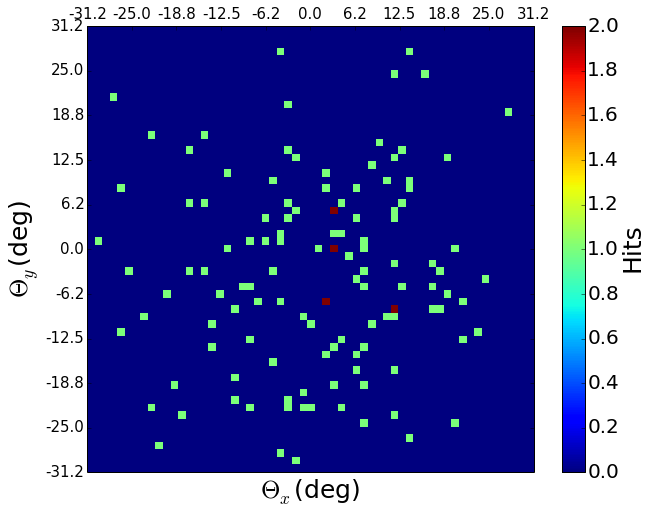

In [227]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(matrix_ang, interpolation='nearest', extent=extent, origin='lower')

ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
#ax.set_xticks(np.arange(Nt))
#ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)


#fig.savefig('Fondo.jpg')
#labelsx


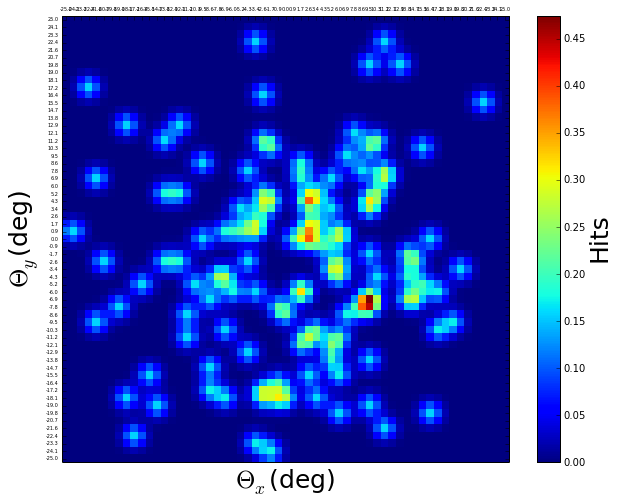

In [228]:
img_ang = ndimage.gaussian_filter(matrix_ang, sigma=(1), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img_ang, interpolation='nearest')
#plt.axvline(x=29, color='k', lw=1, linestyle='--')
#plt.axhline(y=29, color='k', lw=1, linestyle='--')
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
ax.xaxis.tick_top()

Nt = Nd
# Set tick labels
labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
ax.set_xticks(np.arange(Nt))
ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=5)

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

plt.show()

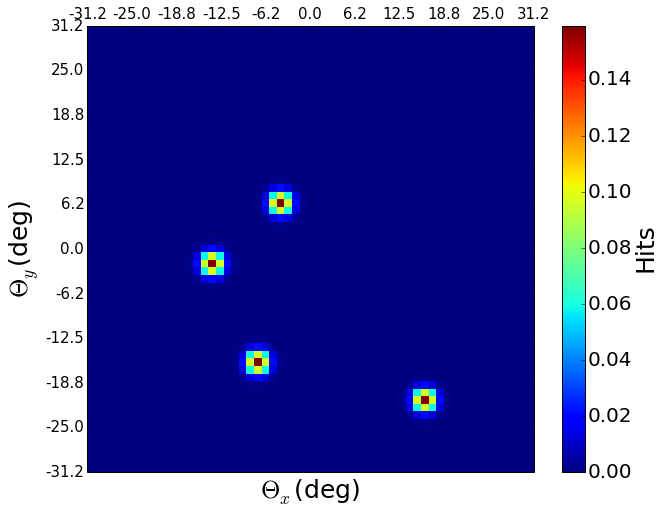

In [218]:
import matplotlib.ticker as ticker

img_ang = ndimage.gaussian_filter(matrix_ang, sigma=(1), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(img_ang, interpolation='nearest', extent=extent, origin='lower')

ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
#ax.set_xticks(np.arange(Nt))
#ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)


#fig.savefig('Fondo.jpg')
#labelsx


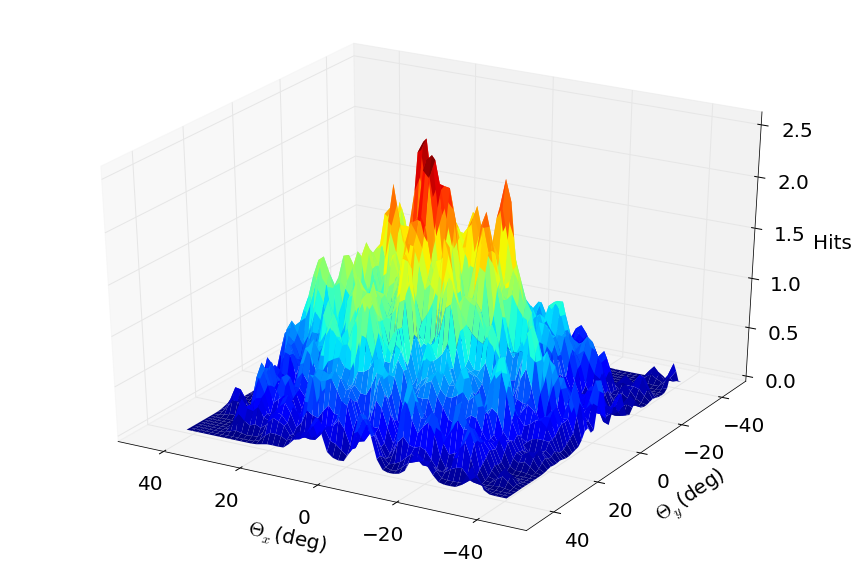

In [126]:
data_array = np.array(img_ang)

fig = plt.figure(figsize=(15, 10))

ax = fig.gca(projection = '3d')
jet = plt.get_cmap('jet')

x = np.linspace(-41, 41, Nd)
y = np.linspace(41, -41, Nd)
X, Y = np.meshgrid(x, y)
Z = data_array

surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
ax.set_zlim3d(0, Z.max())
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 20)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 20)
ax.set_zlabel('Hits', fontsize = 20)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=20)

# Axes rotation
ax.view_init(30, 120)

#fig.savefig('Aceptancia3D.eps')

Solid angle calculation

    1. http://tpm.amc.anl.gov/NJZTools/XEDSSolidAngle.html

    2. https://www.earthobservatory.sg/project/muon-tomography-mayon-volcano-philippines-toward-better-understanding-open-vent-systems

    3. Gilbert -- https://link.springer.com/content/pdf/10.5047%2Feps.2009.07.003.pdf

### Data analysis

In [120]:
file = open("Field_23_14h.dat", 'w')

for i in range (14):
    
    hour = str(i).zfill(2)

    file_Panel_1 = 'field_data/HodCal/MuTe_P1_2019_03_23h' + hour + '.dat'
    file_Panel_2 = 'field_data/HodCal/MuTe_P2_2019_03_23h' + hour + '.dat'
    
    print "Analysing files: " + file_Panel_1 + " " + file_Panel_2

    count = 0
    for line in open(file_Panel_1).xreadlines(  ): count += 1

    print ("Number of lines P1: ") + str(count)

    count = 0
    for line in open(file_Panel_2).xreadlines(  ): count += 1

    print ("Number of lines P2: ") + str(count)
    
    # Init time determination
    
    
    with open(file_Panel_1) as f:
        i = 0;
        for line in f:
        
            if line[0] == '#':
                if line[2] == 's':
                    init_Time1 = int(line[4:15])
                    L1 = i
                    print "Time P1 : " + str(init_Time1) + " Line : " + str(L1)
                    break
            i+= 1
                
    with open(file_Panel_2) as f:
        i = 0
        for line in f:
            if line[0] == '#':
                if line[2] == 's':
                    init_Time2 = int(line[4:15])
                    L2 = i
                    print "Time P2 : " + str(init_Time2) + " Line : " + str(L2)
                    break
            i += 1

    # Tree data creation
    
    with open(file_Panel_1) as P1:
    
        p1_Dic={}
        array = []
        for line in P1:

            if line[0] != '#':
                array.append(line)


            if line[0] == '#':
                if line[2] == 's':
                    address = line[4:14]
                    p1_Dic[address] = array
                    array = []


    with open(file_Panel_2) as P2:

        p2_Dic={}
        array = []
        for line in P2:

            if line[0] != '#':
                array.append(line)

            if line[0] == '#':
                if line[2] == 's':
                    address = line[4:14]
                    p2_Dic[address] = array
                    array = []

    # Coincidence file creation
    
    nevents_P1 = len(p1_Dic)
    nevents_P2 = len(p2_Dic)

    file = open("Field_23_14h.dat", 'a')

    window = 400
    match_counter = 0

    for i in range(3600):
        i+=1
        address_P1 = str(init_Time1 + i)
        address_P2 = str(init_Time1 + i + 1)    # P2 time matching
        if p1_Dic.get(address_P1) != None:
                if p2_Dic.get(address_P2) != None:
                    #print "Addresses: " + address_P1 + " " + address_P2
                    p1_mat = p1_Dic[address_P1]
                    p2_mat = p2_Dic[address_P2]
                    match(file, address_P1, p1_mat, p2_mat, window)
                    match_counter += 1

    file.close() 

    print "Seconds matched = " + str(match_counter) + "\n"


Analysing files: field_data/HodCal/MuTe_P1_2019_03_23h00.dat field_data/HodCal/MuTe_P2_2019_03_23h00.dat
Number of lines P1: 35727
Number of lines P2: 30379
Time P1 : 1553299201 Line : 22
Time P2 : 1553299201 Line : 21
Seconds matched = 3504

Analysing files: field_data/HodCal/MuTe_P1_2019_03_23h01.dat field_data/HodCal/MuTe_P2_2019_03_23h01.dat
Number of lines P1: 29444
Number of lines P2: 25802
Time P1 : 1553302801 Line : 22
Time P2 : 1553302801 Line : 22
Seconds matched = 3441

Analysing files: field_data/HodCal/MuTe_P1_2019_03_23h02.dat field_data/HodCal/MuTe_P2_2019_03_23h02.dat
Number of lines P1: 21695
Number of lines P2: 20336
Time P1 : 1553306401 Line : 22
Time P2 : 1553306401 Line : 20
Seconds matched = 3456

Analysing files: field_data/HodCal/MuTe_P1_2019_03_23h03.dat field_data/HodCal/MuTe_P2_2019_03_23h03.dat
Number of lines P1: 21130
Number of lines P2: 20046
Time P1 : 1553310001 Line : 20
Time P2 : 1553310001 Line : 20
Seconds matched = 3564

Analysing files: field_data/

### Panel attenuation

In [251]:
event_SP = []

for i in range (15):
    
    hour = str(i).zfill(2)
    
    file = 'MuTe_P2_2019_01_30h' + hour + '.dat'
    print file
    
    data = np.loadtxt(file,'string', comments='#')
    N = len(data)
    print ('Pulsos = ' + str(N))
    
    # Extract the events from the data
    

    for i in range(N):

        x=(" ".join(data[i][4]))
        lin=map(int ,x.split(' '))
        if len(lin) == 64:
            event_SP.append(lin)

event_SP = np.array(event_SP)

print "Total events = " + str(len(event_SP))

MuTe_P2_2019_01_30h00.dat
Pulsos = 139251
MuTe_P2_2019_01_30h01.dat
Pulsos = 131857
MuTe_P2_2019_01_30h02.dat
Pulsos = 142063
MuTe_P2_2019_01_30h03.dat
Pulsos = 130964
MuTe_P2_2019_01_30h04.dat
Pulsos = 130194
MuTe_P2_2019_01_30h05.dat
Pulsos = 152306
MuTe_P2_2019_01_30h06.dat
Pulsos = 142691
MuTe_P2_2019_01_30h07.dat
Pulsos = 144711
MuTe_P2_2019_01_30h08.dat
Pulsos = 140945
MuTe_P2_2019_01_30h09.dat
Pulsos = 144471
MuTe_P2_2019_01_30h10.dat
Pulsos = 150322
MuTe_P2_2019_01_30h11.dat
Pulsos = 139694
MuTe_P2_2019_01_30h12.dat
Pulsos = 139542
MuTe_P2_2019_01_30h13.dat
Pulsos = 144147
MuTe_P2_2019_01_30h14.dat
Pulsos = 142601
Total events = 2115759


In [252]:
hist = np.sum(event_SP, axis=0)
chs = np.linspace(0, 63, num=64)

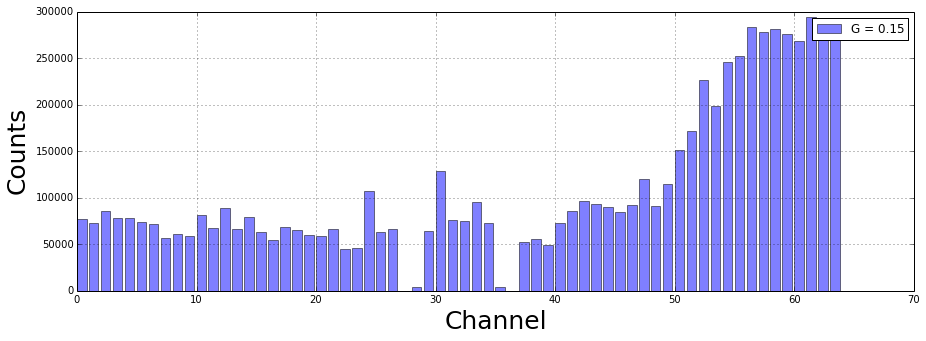

In [253]:
fig = plt.figure(figsize=(15, 5))
plt.bar(chs, hist, alpha=0.5)
plt.xlabel('Channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.legend(["G = 0.15", "Calibrated"])
plt.grid()

Numero de eventos = 365686
SNR = 17.2839156066


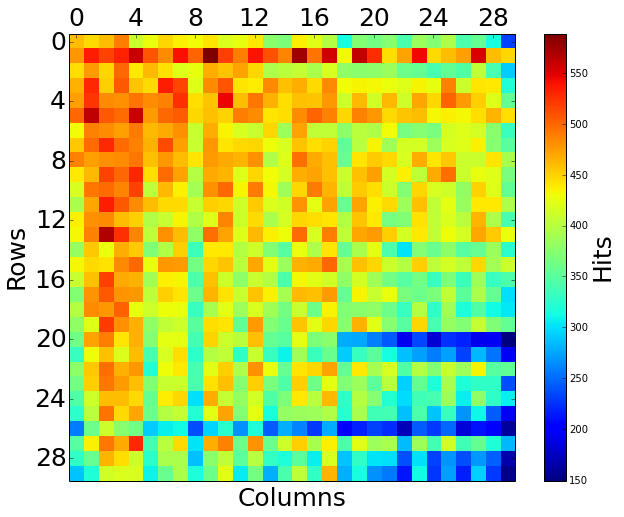

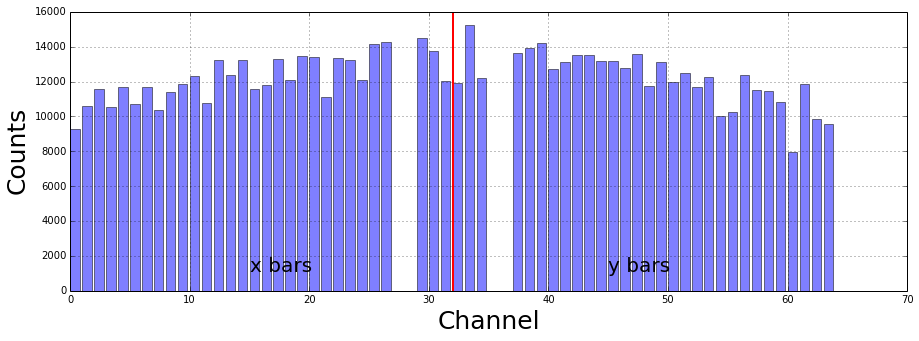

In [254]:
mat = pixel_map(event_SP)

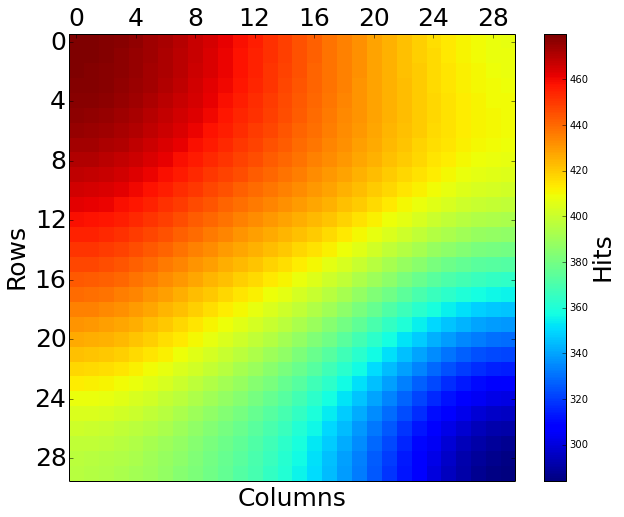

In [266]:
img = ndimage.gaussian_filter(mat, sigma=(5), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img, interpolation='nearest')
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
ax.invert_yaxis()
ax.xaxis.tick_top()

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

plt.show()

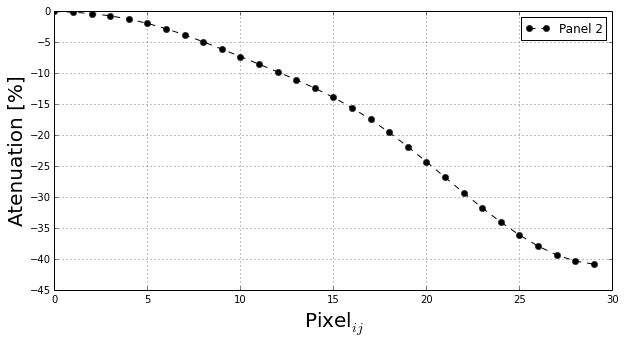

Atenuation percentage = 40.76 


In [267]:
diag = np.diagonal(img)

fig = plt.figure(figsize=(10, 5))
plt.plot((diag/np.max(diag)-1)*100, '--ok')
plt.xlabel("Pixel$_{ij}$", fontsize = 20)
plt.ylabel("Atenuation [%]", fontsize = 20)
plt.legend(["Panel 2"], loc=1)
plt.grid()
plt.show()

print ("Atenuation percentage = %.2f " % ((np.max(diag) - np.min(diag))*100/np.max(diag)))

### Acceptance  calculation

The number of muons detected by the telescope for a given direction $r_{m,n}$ reads

$$N(r_{m,n}, \Delta T)=I(r_{m,n}) \times \Delta T \times \mathcal{T}(r_{m,n})  $$

where $I$ is the flux of muons given in $cm^{-2}sr^{-1}s^{-1}$, $\Delta T$ is the duration of the measured period, and $\mathcal{T}$ is the telescope acceptance experessed in $cm^2 sr$. The acceptance may be written as,


$$\mathcal{T}(r_{m,n}) = S(r_{m,n}) \times \delta \Omega (r_{m,n})$$

where $S$ is the detection surface and $\delta \Omega$ is the angular aperture.

In [49]:
nBars = 30

Nd = (2*nBars-1)    # Number of trajectories
C = nBars-2         # Shiffting index

acceptance = np.zeros((Nd,Nd))

matrix_P1 = np.zeros((nBars, nBars))
matrix_P2 = np.ones((nBars, nBars))

for i in range(nBars):
    for j in range(nBars):
        matrix_P1[i,j] = 1
        for k in range(nBars):
            for l in range(nBars):

                if matrix_P1[i,j]== 1:
                    iP1 = i
                    jP1 = j
                if matrix_P2[k,l]== 1:
                    iP2 = k
                    jP2 = l

                h = iP1 - iP2
                b = jP1 - jP2

                acceptance[h+C,b+C]= acceptance[h+C,b+C] + 1

In [50]:
d = 4       # 4 Pixel size
A = d**2    #  Pixel area
D = 250.0  # 134 Panel separation
d_Omega =  A/(D**2)
print "Angular resolution = " + str(d_Omega)

theta = int(np.rad2deg(np.arctan(d*nBars/D)))/float(nBars)
acceptance = acceptance*d_Omega*A

Angular resolution = 0.000256


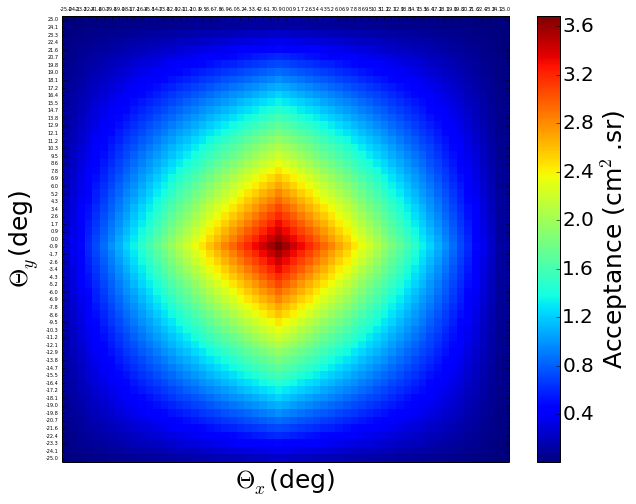

In [51]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

im = plt.imshow(acceptance, interpolation='nearest', origin='low')

ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar()
clb.set_label('Acceptance (cm$^2$.sr)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels
labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
ax.set_xticks(np.arange(Nt))
ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=5)

#fig.savefig('Fondo.jpg')
#labelsx

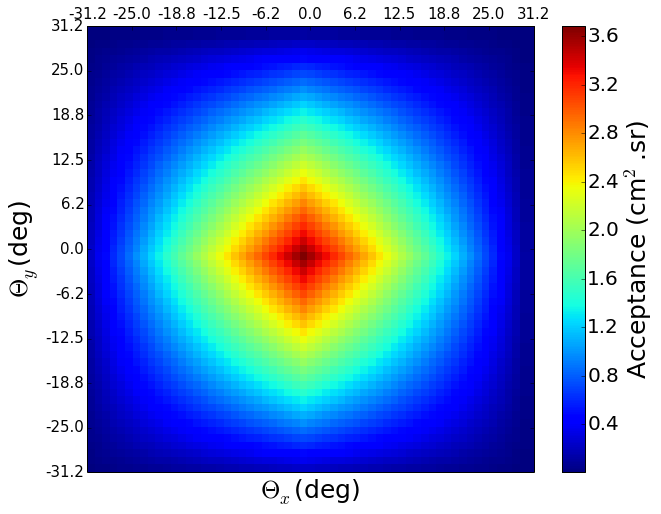

In [52]:

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(acceptance, interpolation='nearest', extent=extent, origin='lower')

ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Acceptance (cm$^2$.sr)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
#ax.set_xticks(np.arange(Nt))
#ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

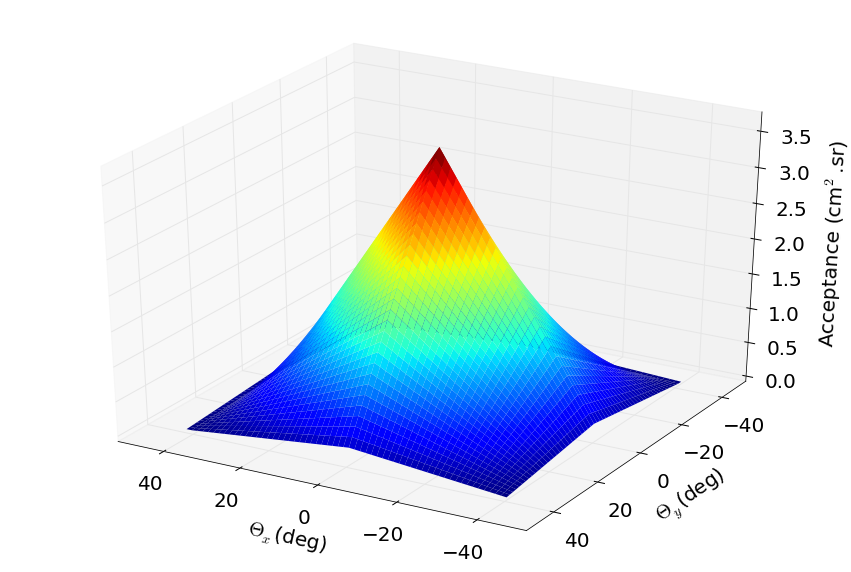

In [53]:
data_array = np.array(acceptance)

fig = plt.figure(figsize=(15, 10))

ax = fig.gca(projection = '3d')
jet = plt.get_cmap('jet')

x = np.linspace(-41, 41, Nd)
y = np.linspace(41, -41, Nd)
X, Y = np.meshgrid(x, y)
Z = data_array

surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
ax.set_zlim3d(0, Z.max())
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 20)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 20)
ax.set_zlabel('Acceptance (cm$^2$.sr)', fontsize = 20)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=20)

# Axes rotation
ax.view_init(30, 120)

Having the number $N$ of muons detected for each direction $r_{m,n}$ during a period $\Delta T$, the integrated flux $I$ reads,

$$I(r_{m,n}) = \frac{N(r_{m,n})}{\Delta T \times \mathcal{T}(r_{m,n})}  (cm^{-2}sr^{-1}s^{-1}) $$

In [127]:
horas = 14
delta_T = horas*3600

Nd = (2*nBars-1)    # Number of trajectories

I_flux = np.zeros((Nd,Nd))

for i in range(Nd):
    for j in range(Nd):
        
        I_flux[i,j] = matrix_ang[i,j]/(delta_T*acceptance[i,j])
        
        if I_flux[i,j] > 0.0002:
            I_flux[i,j] = 0

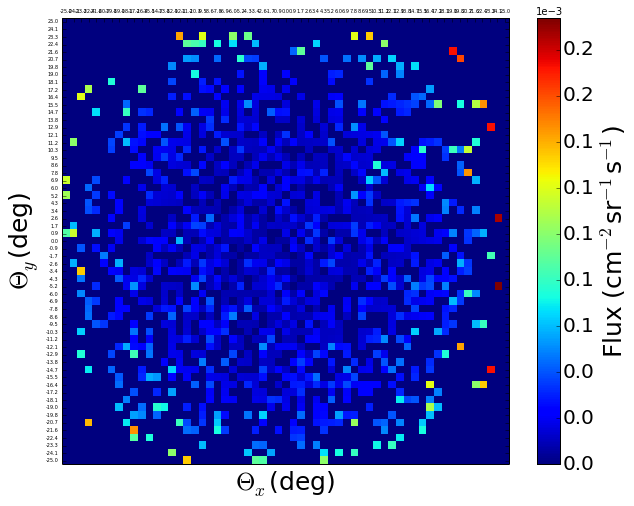

In [128]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

im = plt.imshow(I_flux , interpolation='nearest', origin='low')

ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar(format=OOMFormatter(-3, mathText=False))
clb.set_label('Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels
labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
ax.set_xticks(np.arange(Nt))
ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=5)

#fig.savefig('Fondo.jpg')
#labelsx

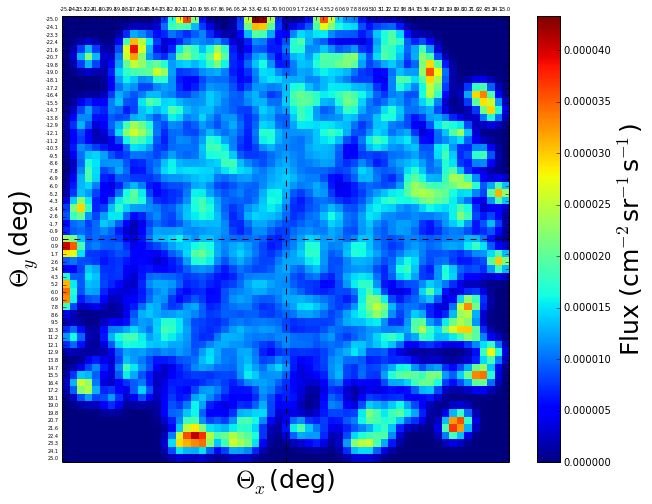

In [129]:
img_flux = ndimage.gaussian_filter(I_flux, sigma=(1), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img_flux, interpolation='nearest')
plt.axvline(x=29, color='k', lw=1, linestyle='--')
plt.axhline(y=29, color='k', lw=1, linestyle='--')
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#ax.invert_yaxis()
ax.xaxis.tick_top()

Nt = Nd
# Set tick label
labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
ax.set_xticks(np.arange(Nt))
ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=5)

# Color bar
clb = plt.colorbar()
clb.set_label('Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)

plt.show()

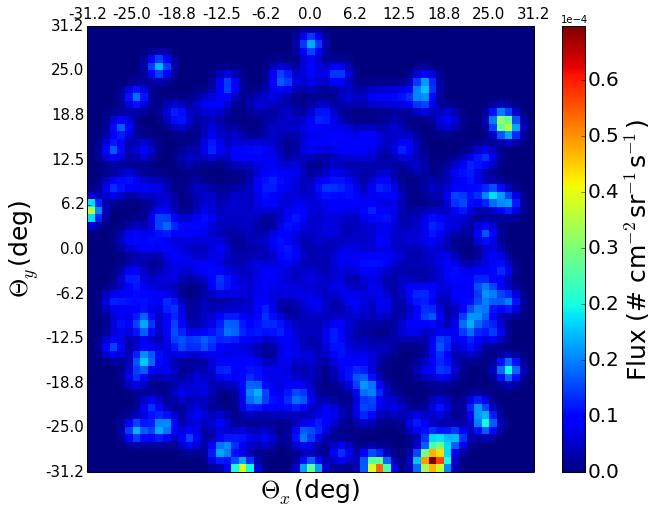

In [188]:
img_flux = ndimage.gaussian_filter(I_flux, sigma=(1), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(img_flux, interpolation='nearest', extent=extent, origin='lower')

ax.xaxis.tick_top()


# Color bar

clb = plt.colorbar(format=OOMFormatter(-4, mathText=False))
clb.set_label('Flux (# cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
#ax.set_xticks(np.arange(Nt))
#ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)